In [15]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

0.20.1
1.12.1
0.18.1


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

### Get Data

In [3]:
df = pd.read_csv("dataset/winemag-data_first150k.csv.zip")

In [7]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [6]:
df.country.value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [8]:
df.region_1.value_counts()

Napa Valley                             6209
Columbia Valley (WA)                    4975
Mendoza                                 3586
Russian River Valley                    3571
California                              3462
Paso Robles                             3053
Willamette Valley                       2096
Rioja                                   1893
Toscana                                 1885
Sonoma County                           1853
Brunello di Montalcino                  1746
Sicilia                                 1701
Alsace                                  1574
Sonoma Coast                            1473
Carneros                                1458
Dry Creek Valley                        1398
Barolo                                  1398
Finger Lakes                            1372
Champagne                               1369
Santa Barbara County                    1319
Walla Walla Valley (WA)                 1225
Yakima Valley                           1162
Alexander 

In [9]:
df.region_2.value_counts()

Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: region_2, dtype: int64

In [19]:
df.points.value_counts()

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

In [10]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


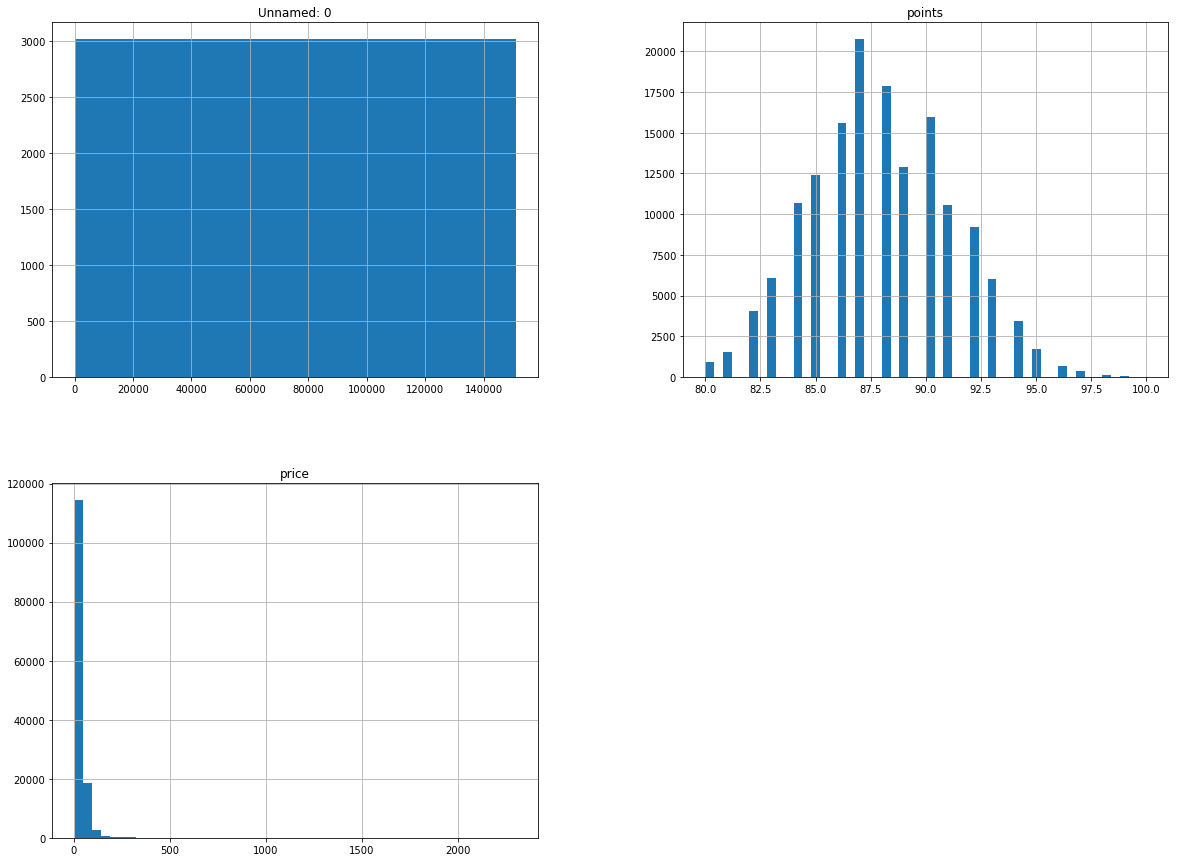

In [13]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

### Create a Test set

In [16]:
train_set, test_set = train_test_split(df, test_size=0.3)

In [18]:
print("train:", len(train_set))
print("test:", len(test_set))

train: 105651
test: 45279


In [53]:
df['points_cat'] = np.ceil(df['points']/10.0)

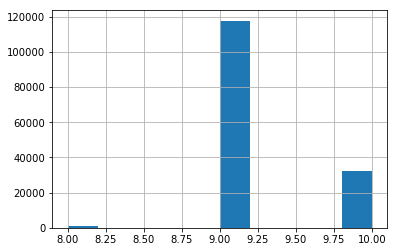

In [54]:
df['points_cat'].hist()

In [56]:
df['points_cat'].value_counts()

9.0     117795
10.0     32237
8.0        898
Name: points_cat, dtype: int64

### discover and visualize the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E874160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F684438>]], dtype=object)

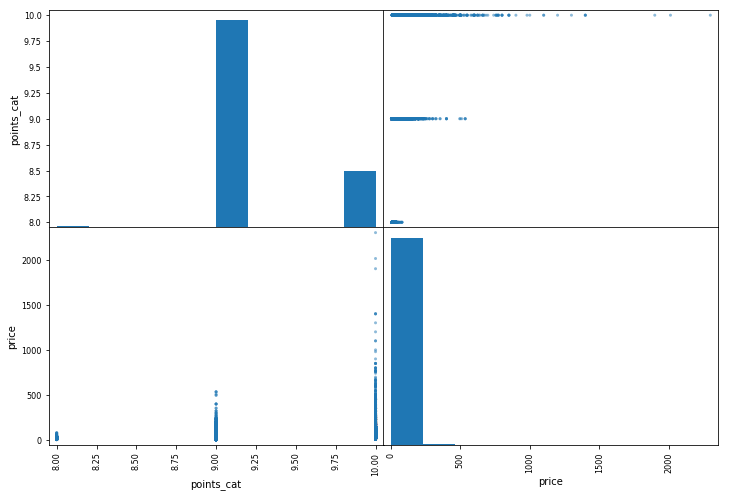

In [58]:
from pandas.plotting import scatter_matrix

attributes = ["points_cat", "price"]
scatter_matrix(df[attributes], figsize=(12, 8))

### Handling text and categorical attributes

In [60]:
from sklearn.preprocessing import LabelEncoder

In [68]:
df = df.dropna(subset=["country"])

In [69]:
df['country'].isnull().sum()

0

In [70]:
country_encoder = LabelEncoder()
country_cat_encoded = country_encoder.fit_transform(df['country'])
country_cat_encoded

array([44, 40, 44, ..., 22, 15, 22], dtype=int64)

In [71]:
country_encoder.classes_

array(['Albania', 'Argentina', 'Australia', 'Austria',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Croatia', 'Cyprus', 'Czech Republic', 'Egypt', 'England',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India',
       'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Luxembourg',
       'Macedonia', 'Mexico', 'Moldova', 'Montenegro', 'Morocco',
       'New Zealand', 'Portugal', 'Romania', 'Serbia', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'Turkey', 'US', 'US-France', 'Ukraine', 'Uruguay'], dtype=object)

In [72]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
country_cat_onehot = encoder.fit_transform(country_cat_encoded.reshape(-1, 1))
country_cat_onehot.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [74]:
from sklearn.preprocessing import LabelBinarizer

country_encoder = LabelBinarizer()
country_cat_onehot = country_encoder.fit_transform(df['country'])
country_cat_onehot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])